
<div style="background-color:#F5F5F5;height:90px">
<Center><h2 style="color:blue;font-size:40px;background-color:#F5F5F5;padding-top:20px" >Sentement analysis</h2><Center>
</div>

<p style="font-size:20px">Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.</p>

<Center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_z8nWP316NWiUfkQJrF-Qoiydp1oN3JnTqJcVAFz4GLZqAYz_&s" width="390" /></Center>

<p style="font-size:20px">Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks :</p>

<ul>
    <li><p style="font-size:14px">Tokenizing the string</p></li>
    <li><p style="font-size:14px">Lowercasing</p></li>
    <li><p style="font-size:14px">Removing stop words and punctuation</p></li>
    <li><p style="font-size:14px">Stemming</p></li>
    <li><p style="font-size:14px">Sequential modelling</p></li>
 </ul>


<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Importing the packages</h3></Center>
    </div>

In [2]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk
from nltk.corpus import twitter_samples
import random
nltk.download('stopwords')
import string   
from tensorflow.keras.preprocessing.text import Tokenizer                        
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Loading the data</h3></Center>
    </div>

In [ ]:
tweets=pd.read_csv("/work/Twitter_Data.csv/Twitter_Data.csv")

In [ ]:
tweets.head(10)
tweets['clean_text']=tweets['clean_text'].astype('str')

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Dropping Nan Values</h3></Center>
    </div>

In [ ]:
tweets=tweets.dropna()


<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Data Visualization</h3></Center>
    </div>

In [ ]:
all_positive_tweets=tweets[tweets['category']==1]['clean_text']
all_neutral_tweets=tweets[tweets['category']==0]['clean_text']
all_negative_tweets=tweets[tweets['category']==-1]['clean_text']

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Interpreting nature of tweet with length of the tweet</h3></Center>
    </div>

In [ ]:
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))
    
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


In [ ]:
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))
    
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

<AxesSubplot:xlabel='category', ylabel='count'>

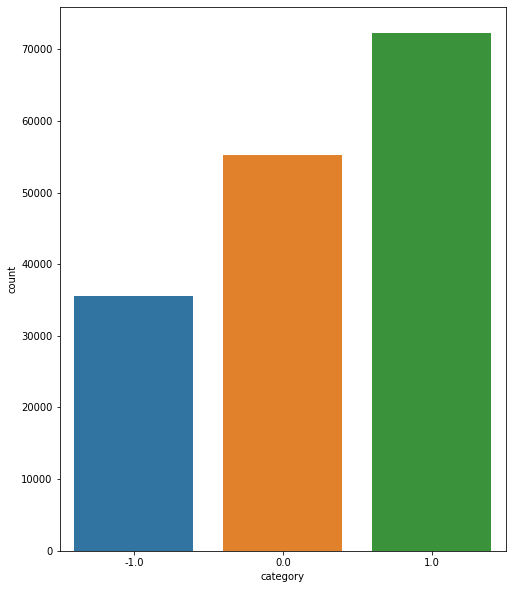

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(x=tweets['category'])

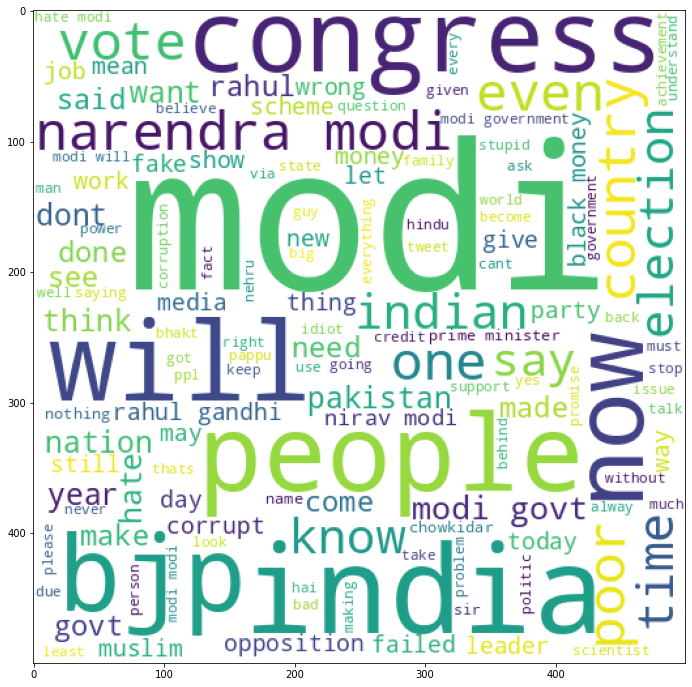

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(tweets[tweets['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(tweets[tweets['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(tweets[tweets['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.imshow(positive_wc)

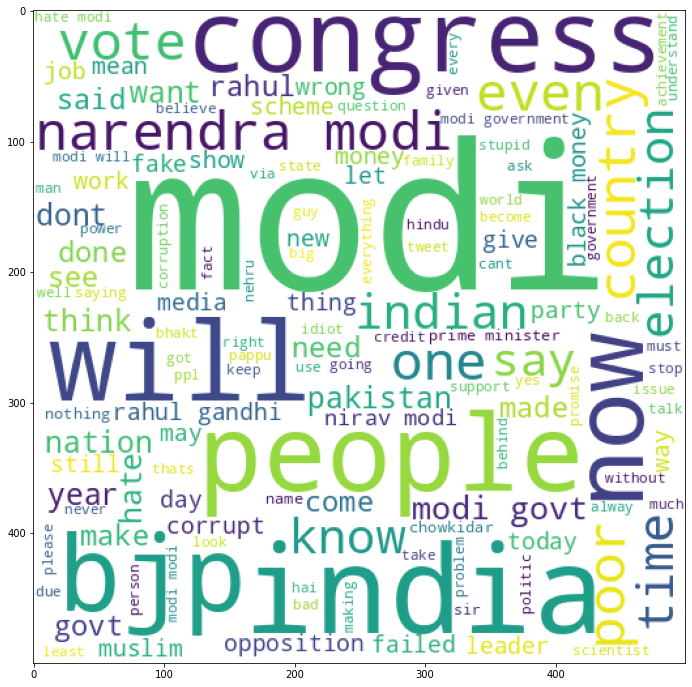

In [ ]:
plt.figure(figsize = (12, 12))
plt.imshow(neutral_wc)

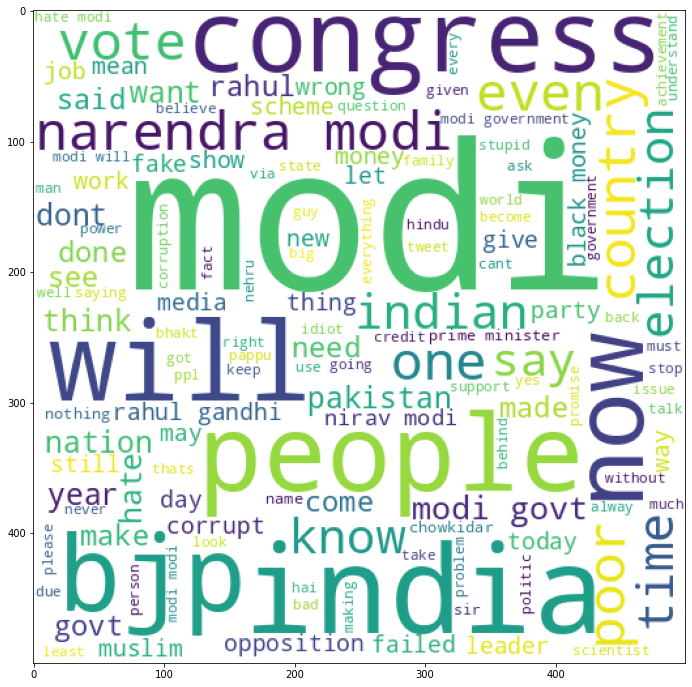

In [ ]:
plt.figure(figsize = (12, 12))
plt.imshow(negative_wc)

In [ ]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Removing StopWords and Punctuations</h3></Center>
    </div>

In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
tweets=tweets.dropna(axis=0)

In [ ]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
# Removing Stopwords
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))

In [ ]:
tweets['clean_text'][0]

'modi promised “minimum government maximum governance” expected begin difficult job reforming state take years get justice state business exit psus temples'

In [ ]:
# removing punctuations
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
tweets['clean_text'][0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Stemming The Words</h3></Center>
    </div>

In [ ]:
stemmer = PorterStemmer() 
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)
    
tweets['clean_text'] = tweets['clean_text'].apply(lambda x:stemming(x))

In [ ]:
tweets['category'] = [2 if x == -1 else x for x in tweets['category']]

In [5]:
tweets_2=tweets.copy()

NameError: name 'tweets' is not defined

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Tokenizing the words</h3></Center>
    </div>

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets.clean_text)
word_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_index)+1

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Padding the tweets </h3></Center>
    </div>

In [ ]:
# padding the tokenized sequences to same length
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(tweets.clean_text),
                        maxlen = max_length)

In [ ]:
tweets.clean_text = lines.tolist()


In [ ]:
tweets.category.value_counts()

In [ ]:
tweets.head()

In [ ]:
tweets.isnull().sum()

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Splitting the data</h3></Center>
    </div>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tweets['clean_text'],tweets['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)



<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Data Modelling</h3></Center>
    </div>

<Center><img src="https://miro.medium.com/max/875/1*SICYykT7ybua1gVJDNlajw.png" width="700" /></Center>

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Sequential Modelling</h3></Center>
    </div>

In [ ]:


model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Adding Optimizer,loss function and Training the Model</h3></Center>
    </div>

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=2, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Model Evaluvation</h3></Center>
    </div>

In [ ]:
predictions = model.predict(X_val)
print(history.history)

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Model Evaluvation</h3></Center>
    </div>

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

<div style="background-color:#F5F5F5;height:70px">
    <Center><h3 style="padding-top:20px ;color:blue;font-size:26px">Accuracy is 85%!!😎</h3></Center>
    </div>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61ead3f7-d694-4acf-abd2-f773879d18c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>